In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from time import time

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fraud.csv to fraud.csv


In [3]:
df = pd.read_csv('fraud.csv')

In [10]:
# Preprocessing
df = df.rename(columns={'oldbalanceOrg': 'Old_Balance_Orig',
                        'newbalanceOrig': 'New_Balance_Orig',
                        'oldbalanceDest': 'Old_Balance_Dest',
                        'newbalanceDest': 'New_Balance_Dest',
                        'nameOrig': 'Name_Orig',
                        'nameDest': 'Name_Dest'})


In [11]:
# Data exploration
print(df.columns)
print(df.head())
print(df.info())


Index(['step', 'type', 'amount', 'Name_Orig', 'Old_Balance_Orig',
       'New_Balance_Orig', 'Name_Dest', 'Old_Balance_Dest', 'New_Balance_Dest',
       'isFraud', 'isFlaggedFraud'],
      dtype='object')
   step      type    amount    Name_Orig  Old_Balance_Orig  New_Balance_Orig  \
0     1   PAYMENT   9839.64  C1231006815          170136.0         160296.36   
1     1   PAYMENT   1864.28  C1666544295           21249.0          19384.72   
2     1  TRANSFER    181.00  C1305486145             181.0              0.00   
3     1  CASH_OUT    181.00   C840083671             181.0              0.00   
4     1   PAYMENT  11668.14  C2048537720           41554.0          29885.86   

     Name_Dest  Old_Balance_Dest  New_Balance_Dest  isFraud  isFlaggedFraud  
0  M1979787155               0.0               0.0        0               0  
1  M2044282225               0.0               0.0        0               0  
2   C553264065               0.0               0.0        1               0  
3 

In [12]:
# Print types of fraudulent transactions
fraudulent_types = list(df.loc[df.isFraud == 1, 'type'].drop_duplicates().values)
print('\n The types of fraudulent transactions are', fraudulent_types)



 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [13]:
# Data shape
print(df.shape)


(1048575, 11)


In [14]:
# Filter out rows where amount is not zero and isFraud is not 1
print(df.loc[(df.amount != 0) | (df.isFraud != 1)].shape)


(1048575, 11)


In [15]:
# Filter out rows where isFraud is 1 and amount is 0
print(df.loc[(df.isFraud == 1) & (df.amount == 0)].shape)


(0, 11)


In [16]:
# Filtering rows where Old_Balance_Orig < amount for isFraud = 1
print('isFraud=1，Old_Balance_Orig<amount', df.loc[(df.isFraud == 1) & (df.Old_Balance_Orig < df.amount)].shape)


isFraud=1，Old_Balance_Orig<amount (24, 11)


In [17]:
# Remove rows where Old_Balance_Orig < amount for isFraud = 1
filtered_df = df.drop(df.loc[(df.isFraud == 1) & (df.Old_Balance_Orig < df.amount)].index)
print(df.shape, filtered_df.shape, df.shape[0] - filtered_df.shape[0])

(1048575, 11) (1048551, 11) 24


In [18]:
# Split data into features (X) and target variable (y)
X = filtered_df.drop(columns=['isFraud', 'type', 'Name_Orig', 'Name_Dest'])
y = filtered_df['isFraud']

In [19]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:

# Train Random Forest classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:

# Predictions on test set
y_pred_rf = clf_rf.predict(X_test)

In [22]:
# Evaluate Random Forest classifier
acc_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy of Random Forest:', acc_rf)
print('F1 macro score:', f1_score(y_test, y_pred_rf, average='macro'))
print('F1 micro score:', f1_score(y_test, y_pred_rf, average='micro'))
print('Confusion matrix of Random Forest:')
print(confusion_matrix(y_test, y_pred_rf))

Accuracy of Random Forest: 0.9997186604422277
F1 macro score: 0.9168310139791758
F1 micro score: 0.9997186604422277
Confusion matrix of Random Forest:
[[209504      1]
 [    58    148]]


In [23]:
# Cross-validation on Random Forest classifier
a = time()
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print('Cross validation scores of Random Forest:', scores_rf)
print('Time cost for cross-validation:', time() - a)

Cross validation scores of Random Forest: [0.99967217 0.99967217 0.99966025 0.99972581 0.99965428]
Time cost for cross-validation: 644.4291055202484


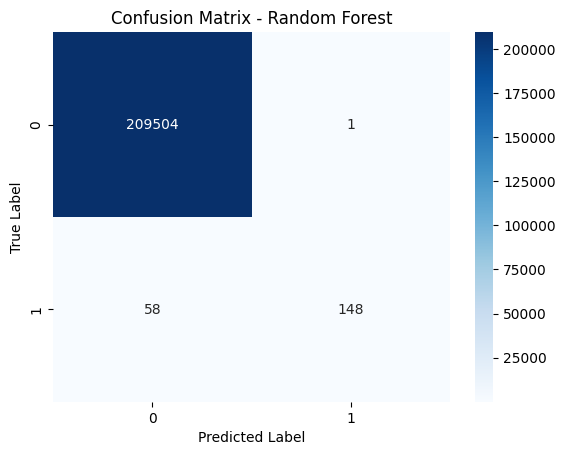

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()



# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, y_pred_rf, 'Confusion Matrix - Random Forest')



In [25]:
# Train Neural Network classifier
clf_nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)
clf_nn.fit(X_train, y_train)

MLPClassifier(max_iter=100, random_state=42)

In [26]:
# Predictions on test set
y_pred_nn = clf_nn.predict(X_test)

In [27]:
# Evaluate Neural Network classifier
acc_nn = accuracy_score(y_test, y_pred_nn)
print('Accuracy of Neural Network:', acc_nn)
print('Confusion matrix of Neural Network:')
print(confusion_matrix(y_test, y_pred_nn))

Accuracy of Neural Network: 0.999237045267058
Confusion matrix of Neural Network:
[[209468     37]
 [   123     83]]


In [28]:
# Cross-validation on Neural Network classifier
a = time()
scores_nn = cross_val_score(clf_nn, X_train, y_train, cv=5)
print('Cross validation scores of Neural Network:', scores_nn)
print('Time cost for cross-validation:', time() - a)


Cross validation scores of Neural Network: [0.99907014 0.98865099 0.99879596 0.99926088 0.99942182]
Time cost for cross-validation: 1358.978605747223


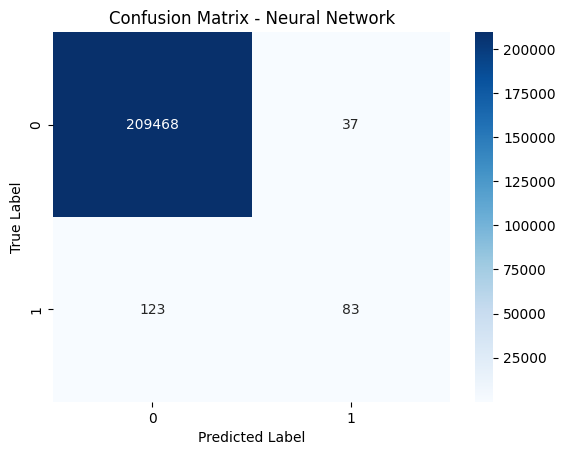

In [29]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Neural Network
plot_confusion_matrix(y_test, y_pred_nn, 'Confusion Matrix - Neural Network')

In [30]:
# Define a function to display fraudulent transactions
def display_fraudulent_transactions(X_data, y_true, y_pred, title, num_transactions=10):
    fraudulent_indices = (y_true == 1) & (y_pred == 1)
    X_fraudulent = X_data[fraudulent_indices]
    print(f"Showing {min(num_transactions, len(X_fraudulent))} fraudulent transactions detected by {title}:")
    print(X_fraudulent.head(num_transactions))


# Display fraudulent transactions detected by Random Forest
display_fraudulent_transactions(X_test, y_test, y_pred_rf, 'Random Forest')


Showing 10 fraudulent transactions detected by Random Forest:
         step       amount  Old_Balance_Orig  New_Balance_Orig  \
1030283    52    969259.07         969259.07              0.00   
4440        4  10000000.00       12900000.00        2930418.44   
574482     25    781953.11         781953.11              0.00   
576028     26   1646181.09        1646181.09              0.00   
1030355    59    394388.09         394388.09              0.00   
1030633    79    432254.84         432254.84              0.00   
1030405    62    724414.43         724414.43              0.00   
1030456    66    548269.98         548269.98              0.00   
1030759    90    249791.30         249791.30              0.00   
1030614    77   2149976.69        2149976.69              0.00   

         Old_Balance_Dest  New_Balance_Dest  isFlaggedFraud  
1030283               0.0              0.00               0  
4440                  0.0              0.00               0  
574482                0.0

In [31]:
# Define a function to display fraudulent transactions
def display_fraudulent_transactions(X_data, y_true, y_pred, title, num_transactions=10):
    fraudulent_indices = (y_true == 1) & (y_pred == 1)
    X_fraudulent = X_data[fraudulent_indices]
    print(f"Showing {min(num_transactions, len(X_fraudulent))} fraudulent transactions detected by {title}:")
    print(X_fraudulent.head(num_transactions))

# Display fraudulent transactions detected by Neural Network
display_fraudulent_transactions(X_test, y_test, y_pred_nn, 'Neural Network')

Showing 10 fraudulent transactions detected by Neural Network:
         step      amount  Old_Balance_Orig  New_Balance_Orig  \
1030283    52   969259.07         969259.07               0.0   
574482     25   781953.11         781953.11               0.0   
1030355    59   394388.09         394388.09               0.0   
1030633    79   432254.84         432254.84               0.0   
1030405    62   724414.43         724414.43               0.0   
1030759    90   249791.30         249791.30               0.0   
848428     41  1783144.33        1783144.33               0.0   
1042896    94  2393539.65        2393539.65               0.0   
1030445    65   881811.11         881811.11               0.0   
805429     40  2757431.53        2757431.53               0.0   

         Old_Balance_Dest  New_Balance_Dest  isFlaggedFraud  
1030283               0.0               0.0               0  
574482                0.0               0.0               0  
1030355               0.0          